<a href="https://colab.research.google.com/github/Saket03-P/Ethereum-Transactions-Fraud-Detection/blob/main/Models/MP_DTC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import pickle
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [6]:
ds=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/increased_transaction_dataset.csv')
x=ds.copy()  
x.drop(['FLAG','Unnamed: 0'],axis=1,inplace=True)
y=ds['FLAG']
y=y.replace('Fraud',1)
y=y.replace('Non - Fraud',0)
counts=y.value_counts()
balancing_factor={0:1,1:3}
x.head(5)

,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,max value received,avg val received,avg val sent,total Ether sent,total ether balance,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0.00,34682.01,173410.03,0,5,1,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e-12,0.0,0.0,0.0,1.0,-1,-1
1,202252.36,13562.51,485879.80,2,6,0,5.882285,2.358151,7.073171,14.146342,0.002562,1.092703e+03,0.0,0.0,0.0,10.0,185,257
2,20807.97,23567.05,355000.13,8,8,0,15.252378,5.730538,5.730074,45.840593,0.003714,0.000000e+00,0.0,0.0,0.0,0.0,4,3
3,80.96,155838.28,468324.43,10,3,0,2.148150,0.762823,0.450816,4.508160,-2.219690,0.000000e+00,0.0,0.0,0.0,0.0,4,3
4,0.00,1060.76,7936.62,1,7,0,1.493095,0.802857,5.619140,5.619140,0.000861,1.337000e+01,0.0,0.0,0.0,1.0,1,74


decision tree classifier with hyper parameter tuning without cost sensitive

In [7]:
params = {'max_depth': [2, 4, 6], 'min_samples_split': [2, 4, 6]}
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)
# Create an instance of the Decision Tree Classifier
dtc = DecisionTreeClassifier()

# Create an instance of GridSearchCV and pass the classifier, hyperparameters, and number of folds for cross-validation
grid = GridSearchCV(dtc, params, cv=5)

# Fit the GridSearchCV instance to the training data
grid.fit(x_train, y_train)

# Access the best hyperparameters and best score
best_params = grid.best_params_
best_score = grid.best_score_

# Use the best hyperparameters to train and test the model on the testing data
best_dtc = DecisionTreeClassifier(**best_params)
best_dtc.fit(x_train, y_train)
best_score_test = best_dtc.score(x_test, y_test)
predictions=best_dtc.predict(x_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test,predictions))
print(recall_score(y_test,predictions))
print(precision_score(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4559
           1       0.98      0.93      0.96      1346

    accuracy                           0.98      5905
   macro avg       0.98      0.96      0.97      5905
weighted avg       0.98      0.98      0.98      5905

0.9812023708721422
0.9331352154531947
0.9835552075176194


Text(0.5, 1.0, 'Decision Tree Classifier on Ethereum Fraud CTGAN dataset without Cost Sensitive Learning')

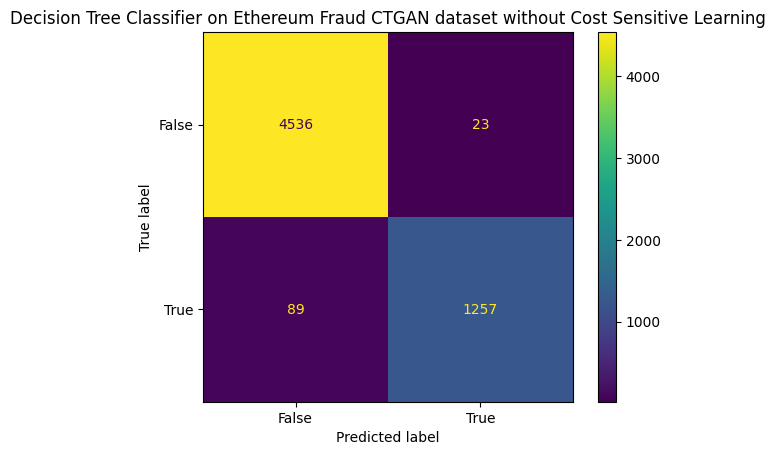

In [ ]:
cm=confusion_matrix(y_test,predictions)
cm_display =ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.title('Decision Tree Classifier on Ethereum Fraud CTGAN dataset without Cost Sensitive Learning')

decision tree classifier with hyper parameter tuning and cst sensitive learning

In [ ]:
params = {'max_depth': [2, 4, 6, 8, 10, 12,14,16], 'min_samples_split': [2, 4, 6 ,8 ,10 ,12,14,16]}
balancing_factor={0:1,1:3}

# Create an instance of the Decision Tree Classifier
dtc = DecisionTreeClassifier(class_weight=balancing_factor)

# Create an instance of GridSearchCV and pass the classifier, hyperparameters, and number of folds for cross-validation
grid = GridSearchCV(dtc, params, cv=5)

# Fit the GridSearchCV instance to the training data
grid.fit(x_train, y_train)

# Access the best hyperparameters and best score
best_params = grid.best_params_
best_score = grid.best_score_

# Use the best hyperparameters to train and test the model on the testing data
best_dtc = DecisionTreeClassifier(**best_params)
best_dtc.fit(x_train, y_train)
best_score_test = best_dtc.score(x_test, y_test)
predictions=best_dtc.predict(x_test)
# print(classification_report(y_test,predictions))
print(accuracy_score(y_test,predictions))
print(recall_score(y_test,predictions))
print(precision_score(y_test,predictions))

0.9786621507197291
0.9264487369985142
0.978806907378336


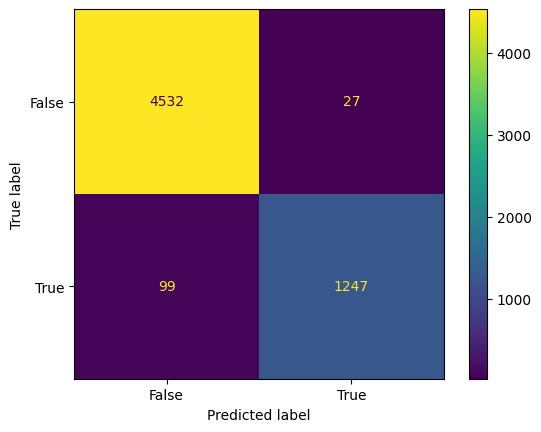

In [ ]:
cm=confusion_matrix(y_test,predictions)
cm_display =ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
#plt.show()

decision tree classifier with hyper parameter tuning and cst sensitive learning =3

In [ ]:
params = {'max_depth': [2, 4, 6, 8, 10, 12], 'min_samples_split': [2, 4, 6 ,8 ,10 ,12]}

# Create an instance of the Decision Tree Classifier
dtc = DecisionTreeClassifier(class_weight='balanced')

# Create an instance of GridSearchCV and pass the classifier, hyperparameters, and number of folds for cross-validation
grid = GridSearchCV(dtc, params, cv=5)

# Fit the GridSearchCV instance to the training data
grid.fit(x_train, y_train)

# Access the best hyperparameters and best score
best_params = grid.best_params_
best_score = grid.best_score_

# Use the best hyperparameters to train and test the model on the testing data
best_dtc = DecisionTreeClassifier(**best_params)
best_dtc.fit(x_train, y_train)
best_score_test = best_dtc.score(x_test, y_test)
predictions=best_dtc.predict(x_test)
print(classification_report(y_test,predictions))
print(accuracy_score(y_test,predictions))
print(recall_score(y_test,predictions))
print(precision_score(y_test,predictions))
importances = best_dtc.feature_importances_
indices = importances.argsort()[::-1] # sort in descending order
n = 10 # select top n features
top_features = x_train.columns[indices][:n]
print(top_features)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      4559
           1       0.95      0.95      0.95      1346

    accuracy                           0.98      5905
   macro avg       0.97      0.97      0.97      5905
weighted avg       0.98      0.98      0.98      5905

0.9766299745977984
0.9479940564635958
0.9494047619047619
Index([' ERC20 most sent token type', ' ERC20_most_rec_token_type',
       'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'avg val received',
       ' ERC20 total Ether sent contract', 'Received Tnx', 'avg val sent',
       ' ERC20 uniq sent addr', 'Avg min between sent tnx'],
      dtype='object')


Text(0.5, 1.0, 'Decision Tree Classifier on Ethereum Fraud CTGAN dataset with Cost Sensitive Learning = 3')

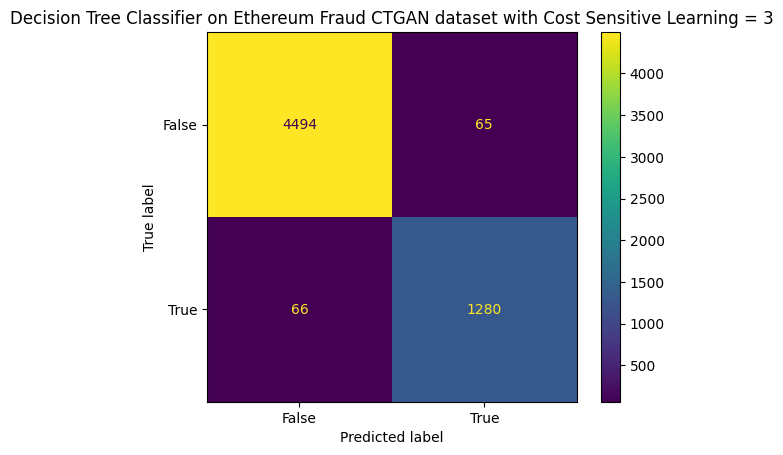

In [ ]:
cm=confusion_matrix(y_test,predictions)
cm_display =ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.title('Decision Tree Classifier on Ethereum Fraud CTGAN dataset with Cost Sensitive Learning = 3')